##### Dataset

In [4]:
# banknotes.csv
# https://mitu.co.in/dataset

##### Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Load the dataset

In [6]:
df = pd.read_csv('datasets/banknotes.csv')

In [7]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


##### Separate the input and output variables

In [9]:
x = df.drop('Class', axis = 1)
y = df['Class']

##### Cross Validation

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

##### Build the model

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rforest = RandomForestClassifier(random_state=0, n_estimators=10)

In [17]:
rforest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [18]:
rforest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

##### Performance Evaluation

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [21]:
y_pred = rforest.predict(x_test)

In [22]:
confusion_matrix(y_test, y_pred)

array([[193,   2],
       [  0, 148]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [24]:
accuracy_score(y_test, y_pred)

0.9941690962099126

##### Plot the tree

In [26]:
from sklearn.tree import plot_tree

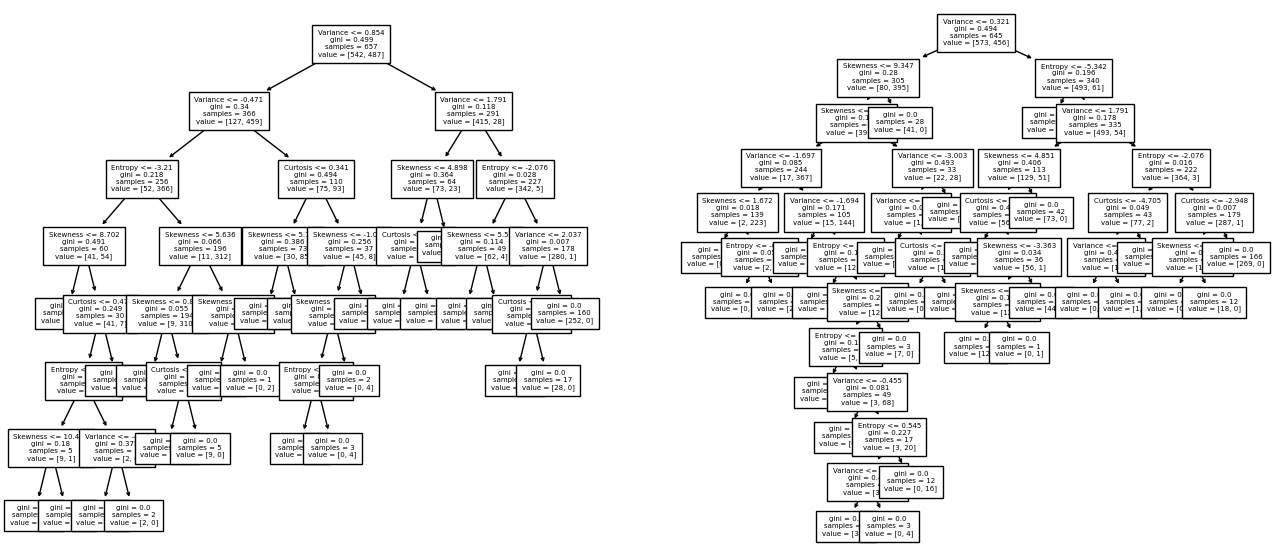

In [35]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plot_tree(rforest.estimators_[2], fontsize=5, feature_names=x.columns);
plt.subplot(1,2,2)
plot_tree(rforest.estimators_[3], fontsize=5, feature_names=x.columns);

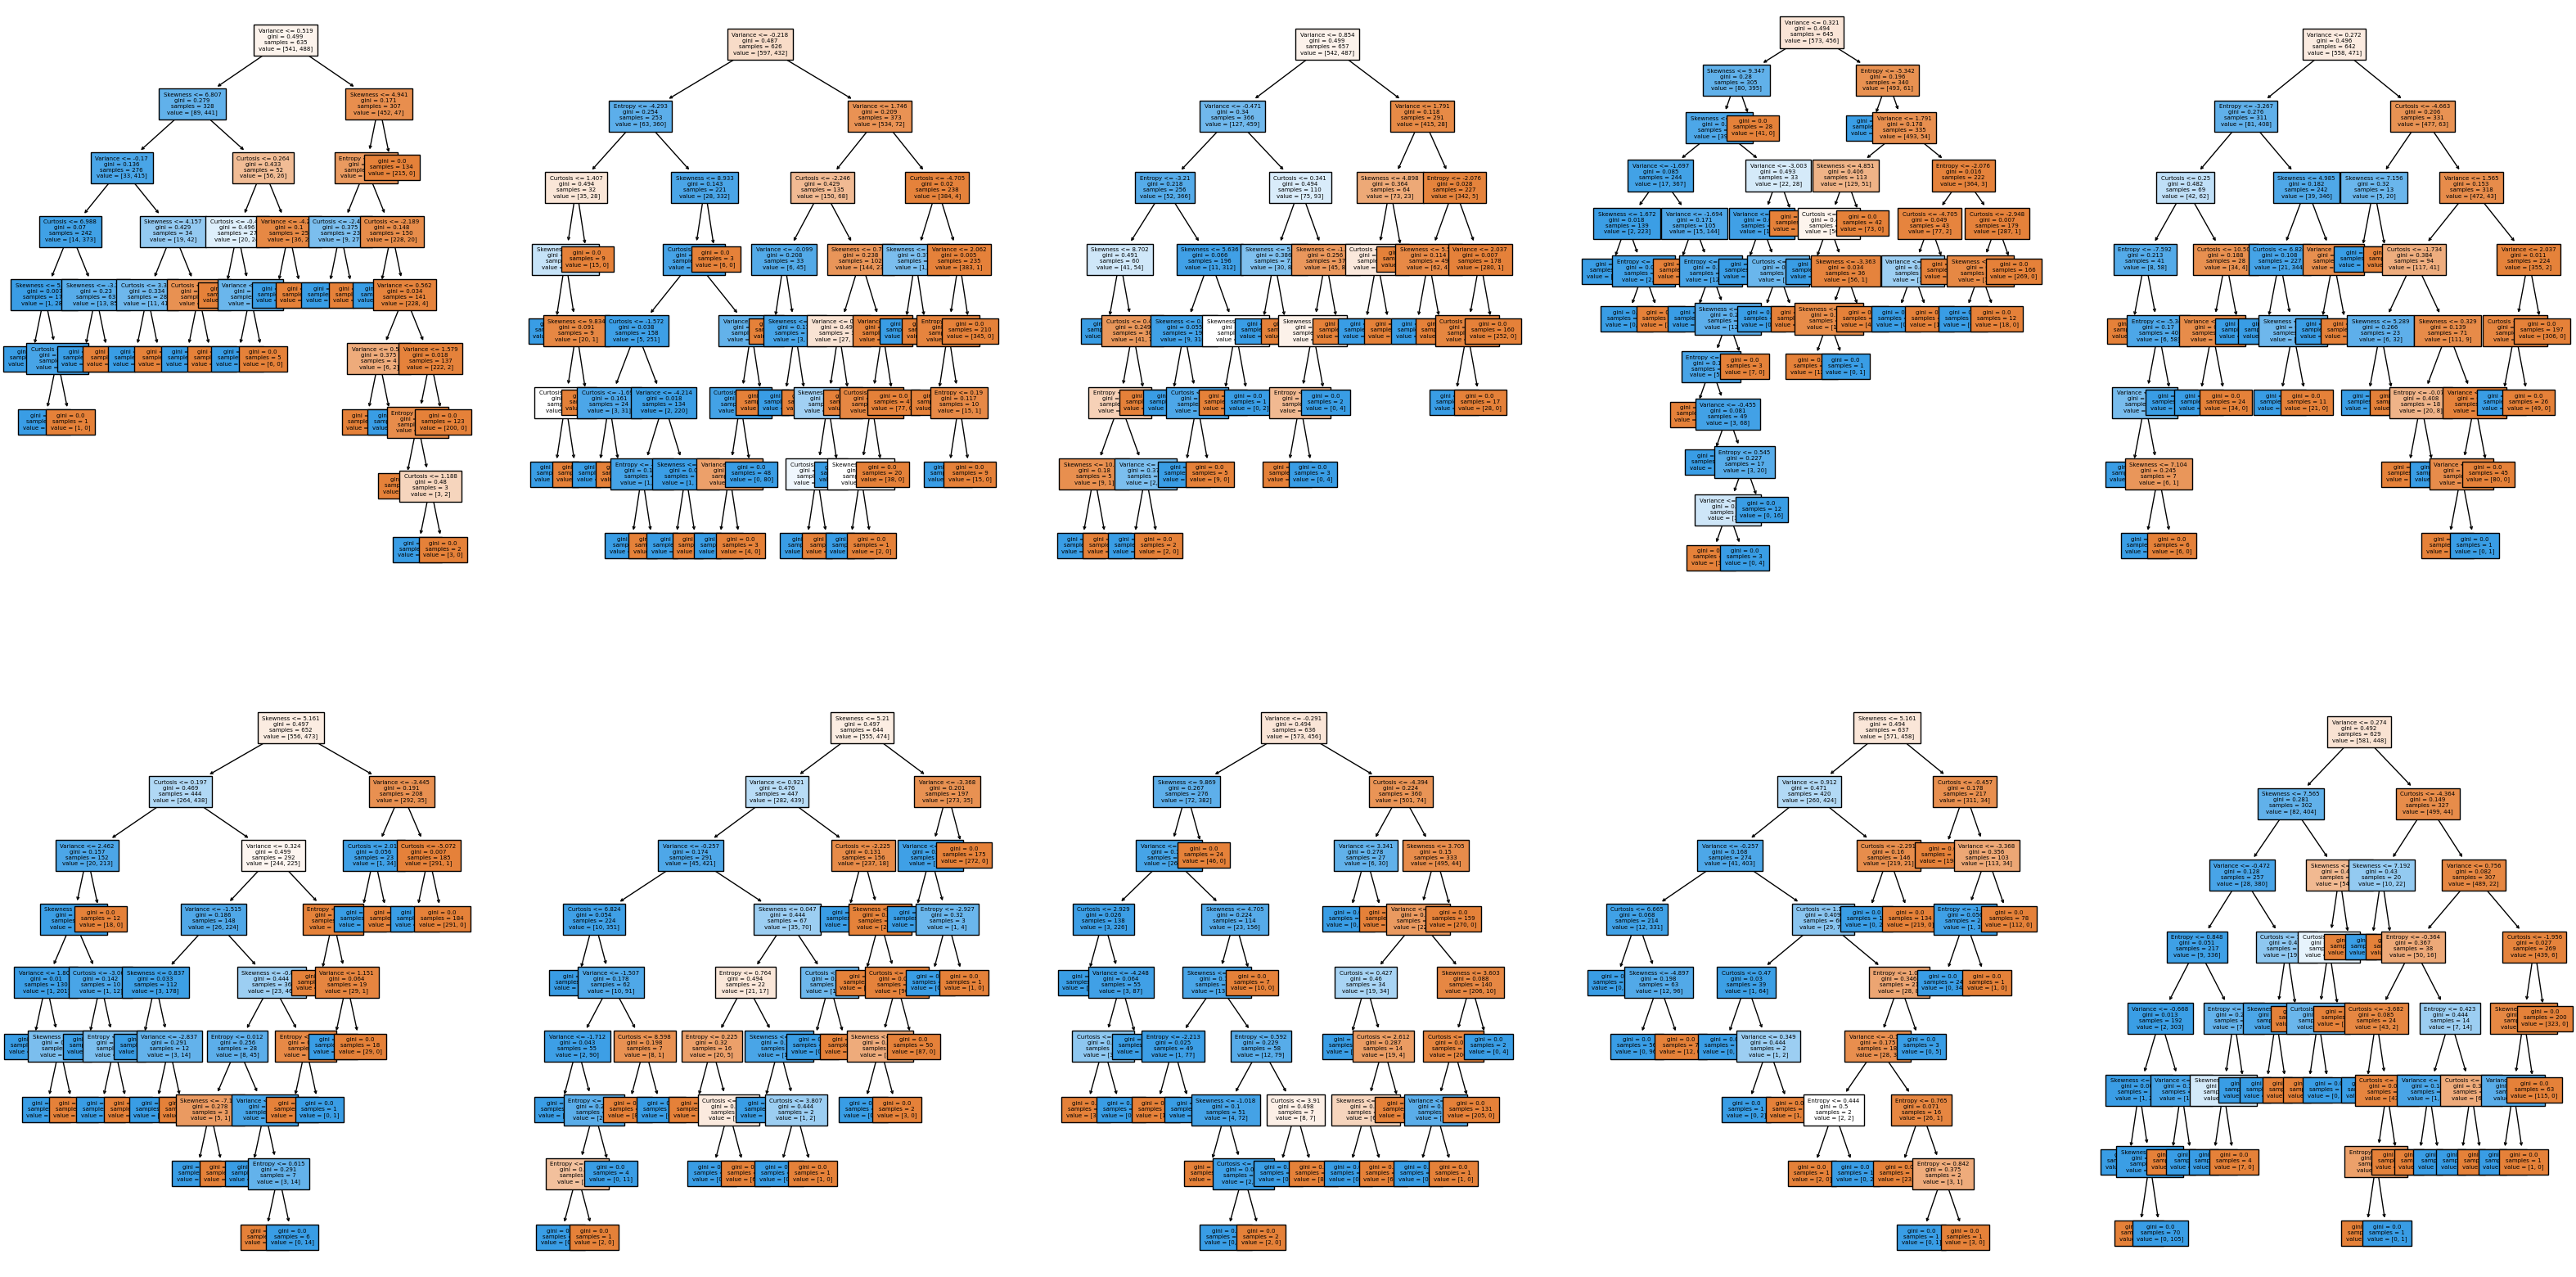

In [43]:
plt.figure(figsize=(40,20))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_tree(rforest.estimators_[i], fontsize=5, feature_names=x.columns,
             filled=True);

plt.savefig('forest.png')